### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

### piece-wise linear regression 

model: $y_i=\begin{cases} x_i +0.3\epsilon_i & x\leq 0 \\ 3.5x_i +0.3\epsilon_i & x>0 \end{cases}$ 

In [4]:
np.random.seed(43052)
N=100
x = np.linspace(-1,1,N)
lamb = lambda x: x*1+np.random.normal()*0.3 if x<0 else x*3.5+np.random.normal()*0.3 
y= np.array(list(map(lamb,x)))
y

array([-0.88497385, -0.65454563, -0.61676249, -0.84702584, -0.84785569,
       -0.79220455, -1.3777105 , -1.27341781, -1.41643729, -1.26404671,
       -0.79590224, -0.78824395, -0.86064773, -0.52468679, -1.18247354,
       -0.29327295, -0.69373049, -0.90561768, -1.07554911, -0.7225404 ,
       -0.69867774, -0.34811037,  0.11188474, -1.05046296, -0.03840085,
       -0.38356861, -0.24299798, -0.58403161, -0.20344022, -0.13872303,
       -0.529586  , -0.27814478, -0.10852781, -0.38294596,  0.02669763,
       -0.23042603, -0.77720364, -0.34287396, -0.04512022, -0.30180793,
       -0.26711438, -0.51880349, -0.53939672, -0.32052379, -0.32080763,
        0.28917092,  0.18175206, -0.48988124, -0.08084459,  0.37706178,
        0.14478908,  0.07621827, -0.071864  ,  0.05143365,  0.33932009,
       -0.35071776,  0.87742867,  0.51370399,  0.34863976,  0.55855514,
        1.14196717,  0.86421076,  0.72957843,  0.57342304,  1.54803332,
        0.98840018,  1.11129366,  1.42410801,  1.44322465,  1.25

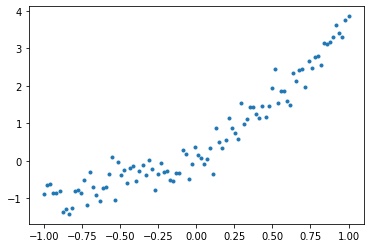

In [5]:
plt.plot(x,y,'.')

#### 풀이1: 단순회귀모형을 이용하여 적합

In [6]:
x= x.reshape(N,1)
y= y.reshape(N,1) 

In [7]:
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(1)) 
net.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')
net.fit(x,y,batch_size=N,epochs=1000,verbose=0) # verbose : loss값이 출력되지 않음 # numpy로 해도 돌아감

2022-04-18 11:40:03.840482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [8]:
net.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.2616348]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.6069048], dtype=float32)>]

In [9]:
# 방법 1
yhat = x * 2.2616348 + 0.6069048 # 최적화 공식
# 방법 2
yhat = net.predict(x)

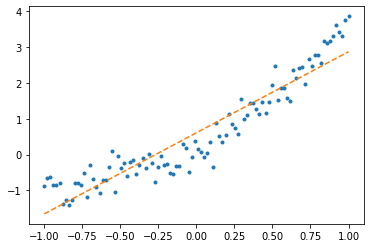

In [10]:
plt.plot(x,y,'.')
plt.plot(x,yhat,'--')

`-` 실패: 이 모형은 epoch을 10억번 돌려도 실패할 모형임 
- 왜? 아키텍처 설계자체가 틀렸음 
- 꺽인부분을 표현하기에는 아키텍처의 표현력이 너무 부족하다 -> under fit의 문제 

#### 풀이2: 비선형 활성화 함수의 도입 

`-` 여기에서 비선형 활성화 함수는 relu

`-` 네트워크를 아래와 같이 수정하자. 

(수정전) hat은 생략

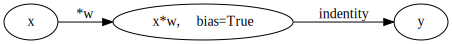

In [11]:
#collapse
gv('''
"x" -> "x*w,    bias=True"[label="*w"] ;
"x*w,    bias=True" -> "y"[label="indentity"] ''')


(수정후) hat은 생략

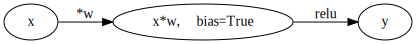

In [12]:
#collapse
gv('''
"x" -> "x*w,    bias=True"[label="*w"] ;
"x*w,    bias=True" -> "y"[label="relu"] ''')


- 마지막에 $f(x)=x$ 라는 함수대신에 relu를 취하는 것으로 구조를 약간 변경 
= 활성화함수(acitivation function)를 indentity에서 relu로 변경

- 활성화함수 : Sigmoid, Hyperbolic Tangent Function 등이 보편적이지만, **기울기소실** 문제 발생

→ 가중치 갱신을 위해 전달되는 기울기가 0에 수렴하여 학습이 전혀 되지 않은 상태 즉, 작은 기울기로 인해 가중치가 매우 조금만 업데이트되므로 학습 속도가 느려짐

`-` relu함수란? 

In [13]:
_x = np.linspace(-1,1,100)
tf.nn.relu(_x)

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01010101, 0.03030303, 0.05050505, 0.07070707, 0.09090909,
       0.11111111, 0.13131313, 0.15151515, 0.17171717, 0.19191919,
       0.21212121, 0.23232323, 0.25252525, 0.27272727, 0.29292929,
       0.31313131, 0.33333333, 0.35353535, 0.37373737, 0.39393939,
       0.41414

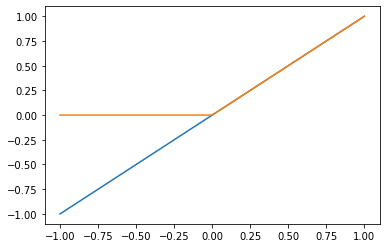

In [14]:
plt.plot(_x,_x)
plt.plot(_x,tf.nn.relu(_x))

- 파란색을 주황색으로 바꿔주는 것이 Relu함수임 
- $f(x)=\max(0,x)=\begin{cases} 0 & x\leq 0 \\ x & x>0 \end{cases}$

`-` 아키텍처: $\hat{y}_i=relu(\hat{w}_0+\hat{w}_1x_i)$,  $relu(x)=\max(0,x)$

`-` 풀이시작 

**1단계**

In [94]:
net2 = tf.keras.Sequential() 

**2단계**

In [95]:
tf.random.set_seed(43053) # 초기값 고정
l1 = tf.keras.layers.Dense(1, input_shape=(1,)) 
a1 = tf.keras.layers.Activation(tf.nn.relu) 

In [96]:
net2.add(l1)

In [97]:
net2.layers

In [98]:
net2.add(a1)

In [99]:
net2.layers

In [100]:
l1.get_weights()

[array([[0.41721308]], dtype=float32), array([0.], dtype=float32)]

In [101]:
net2.get_weights()

[array([[0.41721308]], dtype=float32), array([0.], dtype=float32)]

(네트워크 상황 확인)

In [102]:
u1= l1(x)
#u1= x@l1.weights[0] + l1.weights[1]

In [103]:
v1= a1(u1)
#v1= tf.nn.relu(u1) 

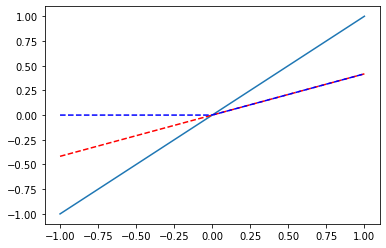

In [104]:
plt.plot(x,x)
plt.plot(x,u1,'--r')
plt.plot(x,v1,'--b')

**3단계**

In [105]:
net2.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')  #optimizer = 'sgd'로 설정 가능, but 학습률이 0.01로 자동으로 설정됨

**4단계**

In [106]:
net2.fit(x,y,epochs=1000,verbose=0,batch_size=N)

`-` result

In [120]:
# 모두 동일한 결과 도출 
yhat = tf.nn.relu(x@l1.weights[0] + l1.weights[1]) # 공식 활용
yhat = net2.predict(x)
yhat = net2(x)
yhat = a1(l1(x))
yhat = net2.layers[1](net2.layers[0](x))

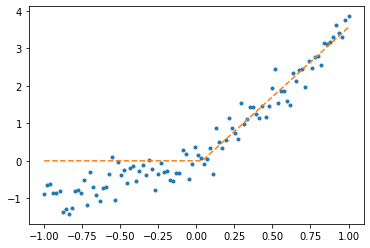

In [121]:
plt.plot(x,y,'.')
plt.plot(x,yhat,'--')

`-` discussion 
- 이것 역시 수백억번 에폭을 반복해도 이 이상 적합이 힘들다 $\to$ 모형의 표현력이 떨어진다. 
- 해결책: 주황색점선이 2개 있다면 어떨까? 

#### 풀이3: 노드수추가 + 레이어추가

목표: 2개의 주황색 점선을 만들자. = 새로운 네트워크 생성

**1단계** 

In [125]:
net3 = tf.keras.Sequential()

**2단계** 

In [128]:
tf.random.set_seed(43053)
l1 = tf.keras.layers.Dense(2,input_shape=(1,)) # 출력값 2개 설정
a1 = tf.keras.layers.Activation(tf.nn.relu)

In [130]:
net3.add(l1)
net3.add(a1) 

# net3.layers

(네트워크 상황 확인) 

In [144]:
l1(x).shape
# l1(x) : (100,1) -> (100,2) 

TensorShape([100, 2])

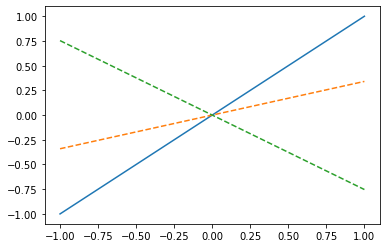

In [145]:
plt.plot(x,x)
plt.plot(x,l1(x),'--')
# plt.plot(x,l1(x)[:,0],'--')
# plt.plot(x,l1(x)[:,1],'--')

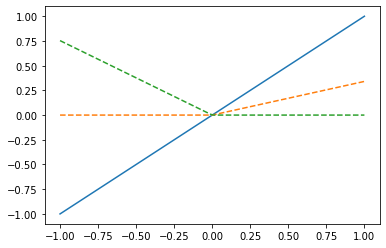

In [146]:
plt.plot(x,x)
plt.plot(x,a1(l1(x)),'--') #relu를 적용했을 경우

`-` 이 상태에서는 yhat이 안나온다. 왜? 
- 차원이 안맞음. `a1(l1(x))`의 차원은 (N,2)인데 최종적인 yhat의 차원은 (N,1)이어야 함. → 회귀 문제의 경우, 하나의 예측값을 가져야 하므로
- 차원이 어찌저찌 맞다고 쳐도 relu를 통과하면 항상 yhat>0 임. 따라서 음수값을 가지는 y는 0으로 밖에 맞출 수 없음. 

`-` 해결책: `a1(l1(x))`에 연속으로(Sequential하게!:순서에 맞게) 또 다른 레이어를 설계! (N,2) -> (N,1) 이 되도록! 
- `yhat= bias + weight1 * a1(l1(x))[0] + weight2 * a1(l1(x))[1]` 

`-` 즉 a1(l1(x)) 를 새로운 입력으로 해석하고 출력을 만들어주는 선형모형을 다시태우면 된다. 
- 입력차원: 2 
- 출력차원: 1 

In [148]:
net3.layers

In [149]:
tf.random.set_seed(43053) 
l2 = tf.keras.layers.Dense(1, input_shape=(2,))

In [151]:
net3.add(l2) 

In [152]:
net3.layers

In [153]:
net3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 4         
                                                                 
 activation_9 (Activation)   (None, 2)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


`-`net3 모델은 2개의 은닉층을 가짐

`-` 추정해야할 파라메터수가 4,0,3으로 나온다. 

`-` 수식표현: $X \to X@W^{(1)}+b^{(1)} \to relu(X@W^{(1)}+b^{(1)}) \to relu(X@W^{(1)}+b^{(1)})@W^{(2)}+b^{(2)}=yhat$

- 입력 데이터(입력층) → 가중치 행렬과 편향벡터를 사용하여 선형 변환 → 은닉층에 비선현성 추가 → 모델의 예측값

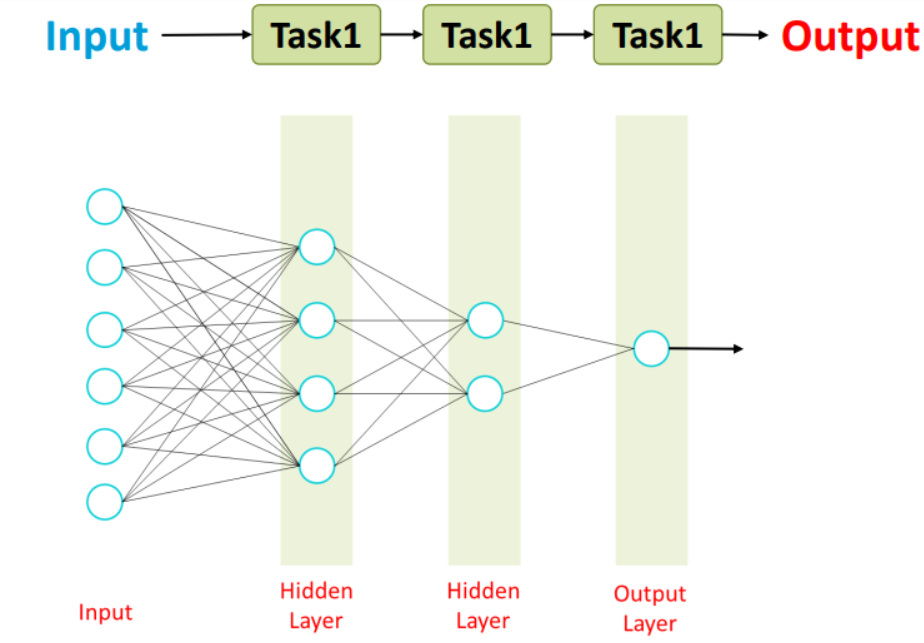

`-` 참고: 추정할 파라메터수가 많다 = 복잡한 모형이다. 
- 초거대AI: 추정할 파라메터수가 엄청 많은.. 

In [158]:
net3.weights

[<tf.Variable 'dense_10/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.34065306, -0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.34065306],
        [-0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [159]:
l1.weights

[<tf.Variable 'dense_10/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.34065306, -0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [160]:
l2.weights

[<tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.34065306],
        [-0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

`-` 좀 더 간단한 수식표현: $X \to (u_1 \to v_1) \to (u_2 \to v_2) = yhat$
- $u_1= X@W^{(1)}+b^{(1)}$  # 선형변환
- $v_1= relu(u_1)$  # 활성화 함수
- $u_2= v_1@W^{(2)}+b^{(2)}$  # 선형변환
- $v_2= indentity(u_2):=yhat$ # 활성화 함수

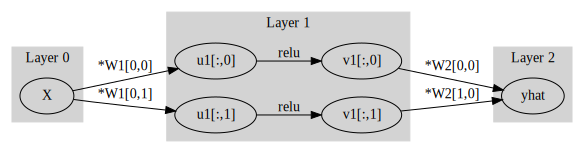

In [123]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "u1[:,0]"[label="*W1[0,0]"]
    "X" -> "u1[:,1]"[label="*W1[0,1]"]
    "u1[:,0]" -> "v1[:,0]"[label="relu"]
    "u1[:,1]" -> "v1[:,1]"[label="relu"]
    label = "Layer 1"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "v1[:,0]" -> "yhat"[label="*W2[0,0]"]
    "v1[:,1]" -> "yhat"[label="*W2[1,0]"]
    label = "Layer 2"
}
''')


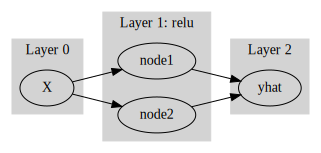

In [162]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "node1"
    "X" -> "node2"
    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "yhat"
    "node2" -> "yhat"
    label = "Layer 2"
}
''')

**3단계**

In [164]:
net3.compile(loss='mse',optimizer=tf.optimizers.SGD(0.1))

**4단계**

In [166]:
net3.fit(x,y,epochs=1000,verbose=0, batch_size=N) 

`-` 결과확인 

In [167]:
net3.weights

[<tf.Variable 'dense_10/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[ 1.6352799 , -0.85507524]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([-0.08284465,  0.85552216], dtype=float32)>,
 <tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.6328746],
        [-1.2001747]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([1.0253307], dtype=float32)>]

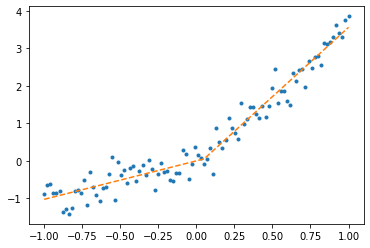

In [169]:
plt.plot(x,y,'.') 
plt.plot(x,net3(x),'--')

`-` 분석 

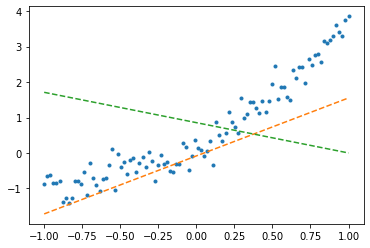

In [171]:
plt.plot(x,y,'.') 
plt.plot(x,l1(x),'--')

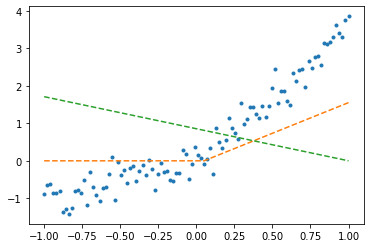

In [172]:
plt.plot(x,y,'.') 
plt.plot(x,a1(l1(x)),'--')

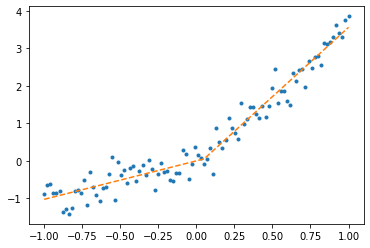

In [173]:
plt.plot(x,y,'.') 
plt.plot(x,l2(a1(l1(x))),'--')

`-` 마지막 2개의 그림을 분석 

In [174]:
l2.weights

[<tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.6328746],
        [-1.2001747]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([1.0253307], dtype=float32)>]

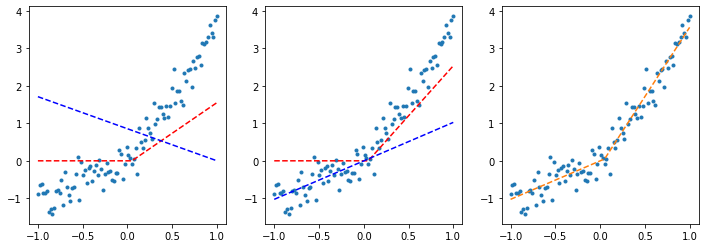

In [187]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3) 
fig.set_figwidth(12) 
ax1.plot(x,y,'.')
ax1.plot(x,a1(l1(x))[:,0],'--r')
ax1.plot(x,a1(l1(x))[:,1],'--b')
ax2.plot(x,y,'.')
ax2.plot(x,a1(l1(x))[:,0]*1.6328746,'--r')
ax2.plot(x,a1(l1(x))[:,1]*(-1.2001747)+1.0253307,'--b')
ax3.plot(x,y,'.')
ax3.plot(x,a1(l1(x))[:,0]*1.6328746+a1(l1(x))[:,1]*(-1.2001747)+1.0253307,'--')



#### 풀이3의 실패

In [189]:
tf.random.set_seed(43054) 
## 1단계
net3 = tf.keras.Sequential() 
## 2단계
net3.add(tf.keras.layers.Dense(2))
net3.add(tf.keras.layers.Activation('relu')) 
net3.add(tf.keras.layers.Dense(1))
## 3단계 
net3.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')
## 4단계 
net3.fit(x,y,epochs=1000,verbose=0,batch_size=N)

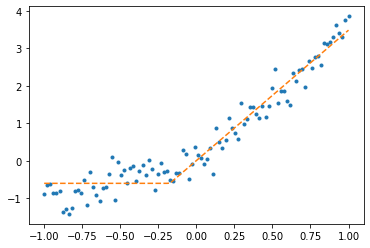

In [190]:
plt.plot(x,y,'.')
plt.plot(x,net3(x),'--')

`-` 엥? 에폭이 부족한가?

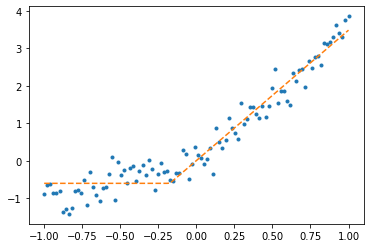

In [191]:
net3.fit(x,y,epochs=10000,verbose=0,batch_size=N)
plt.plot(x,y,'.')
plt.plot(x,net3(x),'--')

`-` 실패분석 

In [193]:
l1,a1,l2 = net3.layers

In [194]:
l2.weights

[<tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.65121335],
        [1.8592643 ]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([-0.60076195], dtype=float32)>]

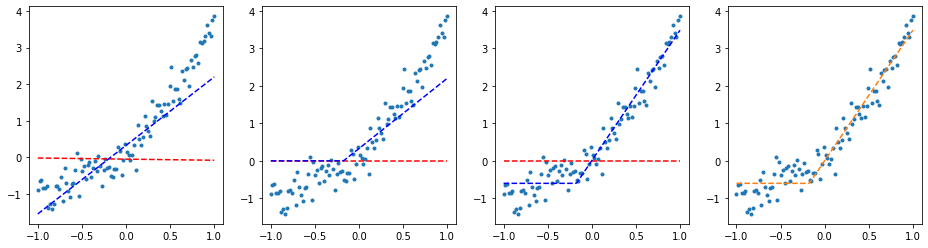

In [197]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4) 
fig.set_figwidth(16) 
ax1.plot(x,y,'.')
ax1.plot(x,l1(x)[:,0],'--r')
ax1.plot(x,l1(x)[:,1],'--b')
ax2.plot(x,y,'.')
ax2.plot(x,a1(l1(x))[:,0],'--r')
ax2.plot(x,a1(l1(x))[:,1],'--b')
ax3.plot(x,y,'.')
ax3.plot(x,a1(l1(x))[:,0]*0.65121335,'--r')
ax3.plot(x,a1(l1(x))[:,1]*(1.8592643)+(-0.60076195),'--b')
ax4.plot(x,y,'.')
ax4.plot(x,a1(l1(x))[:,0]*0.65121335+a1(l1(x))[:,1]*(1.8592643)+(-0.60076195),'--')

- 보니까 빨간색선이 하는 역할을 없음 
- 그런데 생각해보니까 이 상황에서는 빨간색선이 할수 있는 일이 별로 없음 
- 왜? 지금은 나름 파란색선에 의해서 최적화가 된 상태임 $\to$ 빨간선이 뭔가 하려고하면 최적화된 상태가 깨질 수 있음 (loss 증가) 
- 즉 이 상황 자체가 나름 최적회된 상태이다. 이러한 현상을 "global minimum을 찾지 못하고 local minimum에 빠졌다"라고 표현한다. 

확인:

In [198]:
net3.weights

[<tf.Variable 'dense_12/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-0.03077251,  1.8713338 ]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(2,) dtype=float32, numpy=array([-0.04834982,  0.3259186 ], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.65121335],
        [1.8592643 ]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([-0.60076195], dtype=float32)>]

In [200]:
# 데이터 직접 선언해보기
W1= tf.Variable(tnp.array([[-0.03077251,  1.8713338 ]]))
b1= tf.Variable(tnp.array([-0.04834982,  0.3259186 ]))
W2= tf.Variable(tnp.array([[0.65121335],[1.8592643 ]]))
b2= tf.Variable(tnp.array([-0.60076195])) 

In [201]:
# MSE 활용하여 손실 계산
with tf.GradientTape() as tape: 
    u = tf.constant(x) @ W1 + b1 
    v = tf.nn.relu(u) 
    yhat = v@W2 + b2 
    loss = tf.losses.mse(y,yhat) 

In [202]:
# 기울기 계산
tape.gradient(loss,[W1,b1,W2,b2])

[<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[ 0.00000000e+00, -4.77330119e-05]])>,
 <tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.0000000e+00, 3.1478608e-06])>,
 <tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[ 0.00000000e+00],
        [-4.74910706e-05]])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([-2.43031263e-05])>]

예상대로 계수값이 거의 다 0이다. (수렴문제?)

- 최적화(Optimizer) 종류
<center><img src='https://blog.kakaocdn.net/dn/4UH6i/btrgcBrV3jU/ydgDMovBkv2r3qRTMnJSJK/img.gif' width=600/></center>

In [ ]:
# Momentum GD 적용해보기
# 기울기 0을 탈출하지 못한다는 것은 훈련이 느리다는 것 -> 관성을 적용하여 변수가 가던 방향에 속도항을 추가함
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 손실 함수 정의 (평균 제곱 오차)
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Momentum 옵티마이저 생성
learning_rate = 0.1
momentum = 0.9
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

# 모델 컴파일
model.compile(optimizer=optimizer, loss=custom_loss)

# 모델 훈련
epochs = 1000
model.fit(x, y, epochs=epochs, verbose=0)

# 훈련된 모델을 사용하여 예측
y_pred = model.predict(x)

# 결과 확인
print("Predicted:")
print(y_pred[:5])
print("Actual:")
print(y[:5])


In [ ]:
with tf.GradientTape() as tape:
    # 손실 함수 계산
    loss = custom_loss(y, model(x))

# 기울기 계산
gradients = tape.gradient(loss, model.trainable_variables)

# 기울기 출력
for var, grad in zip(model.trainable_variables, gradients):
    print(f'Variable: {var.name}, Gradient: {grad.numpy()}')

#### 풀이4: 노드수를 더 추가한다면? 

`-` 노드수를 더 추가해보면 어떻게 될까? (주황색 점선이 더 여러개 있다면?)

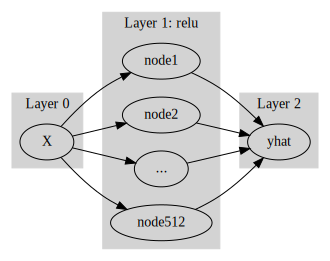

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "node1"
    "X" -> "node2"
    "X" -> "..."
    "X" -> "node512"
    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "yhat"
    "node2" -> "yhat"
    "..." -> "yhat"
    "node512" -> "yhat"
    label = "Layer 2"
}
''')

In [ ]:
tf.random.set_seed(43056)
net4= tf.keras.Sequential()
net4.add(tf.keras.layers.Dense(512,activation='relu')) # 이렇게 해도됩니다. 
net4.add(tf.keras.layers.Dense(1))         
net4.compile(loss='mse',optimizer=tf.optimizers.SGD(0.1)) 
net4.fit(x,y,epochs=1000,verbose=0,batch_size=N) 

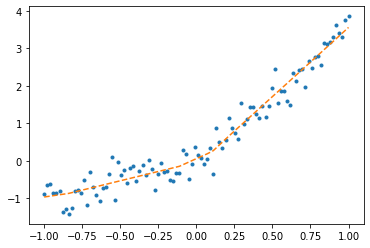

In [ ]:
plt.plot(x,y,'.')
plt.plot(x,net4(x),'--')

- 잘된다.. 
- 한두개의 노드가 역할을 못해도 다른노드들이 잘 보완해주는듯!

`-` 노드수가 많으면 무조건 좋다? -> 대부분 나쁘지 않음. 그런데 종종 맞추지 말아야할것도 맞춤.. 즉, 노이즈값도 학습할 수 있다..(overfit) 

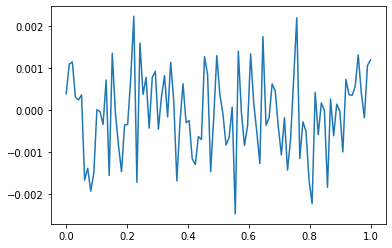

In [ ]:
np.random.seed(43052)
N=100 
_x = np.linspace(0,1,N).reshape(N,1) 
_y = np.random.normal(loc=0,scale=0.001,size=(N,1))
plt.plot(_x,_y)

In [ ]:
tf.random.set_seed(43052) 
net4 = tf.keras.Sequential()
net4.add(tf.keras.layers.Dense(512,activation='relu'))
net4.add(tf.keras.layers.Dense(1))
net4.compile(loss='mse',optimizer=tf.optimizers.SGD(0.5))
net4.fit(_x,_y,epochs=1000,verbose=0,batch_size=N)

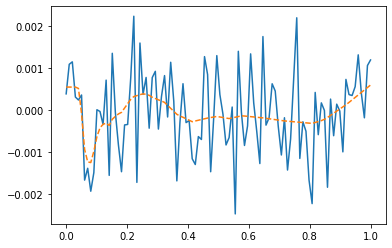

In [ ]:
plt.plot(_x,_y)
plt.plot(_x,net4(_x),'--')

- 이 예제는 추후 다시 공부할 예정 

### Logistic regression 

#### motive 

`-` 현실에서 이런 경우가 많음 
- $x$가 커질수록 (혹은 작아질수록) 성공확률이 올라간다. 

`-` 이러한 모형은 아래와 같이 설계할 수 있음 <-- 외우세요!!
- $y_i \sim Ber(\pi_i)$, where $\pi_i=\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

- $\hat{y}_i =\frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+exp(-\hat{w}_0-\hat{w}_1x_i)}$

- $loss=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$
→ 실제 레이블(y)이 1일 때, 모델이 1을 예측한 경우의 로그 손실 + 실제 레이블(y)이 0일 때, 모델이 0을 예측한 경우의 로그 손실

`-` 위와 같은 손실함수를 BCEloss라고 부른다. (BCE는 Binary Cross Entropy의 약자)

- CrossEntropyLoss 함수

<center><img src='https://miro.medium.com/max/1944/1*70OE3A8sQn4Yl3VPTmChkA.png' width=600/></center>

→ 클래스가 2개인 binary case 인 경우, BCEloss 사용

#### 예제 

In [ ]:
N = 2000 

In [ ]:
x = tnp.linspace(-1,1,N).reshape(N,1)
w0 = -1 
w1 = 5 
u = w0 + x*w1 
#v = tf.constant(np.exp(u)/(1+np.exp(u))) # v=πi 
v = tf.nn.sigmoid(u) 
y = tf.constant(np.random.binomial(1,v),dtype=tf.float64) 

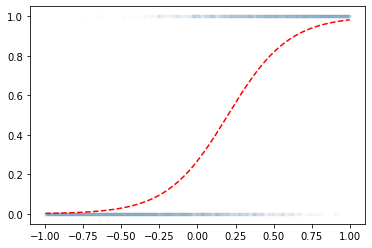

In [ ]:
plt.plot(x,y,'.',alpha=0.02)
plt.plot(x,v,'--r')

`-` 이 아키텍처(yhat을 얻어내는 과정)를 다어어그램으로 나타내면 아래와 같다.  

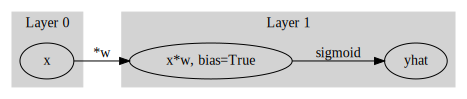

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x" -> "x*w, bias=True"[label="*w"]
    "x*w, bias=True" -> "yhat"[label="sigmoid"]
    label = "Layer 1"
}
''')

`-` 또는 간단하게 아래와 같이 쓸 수 있다. 

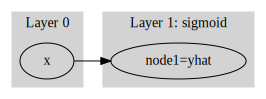

In [ ]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    x
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    x -> "node1=yhat"
    label = "Layer 1: sigmoid"
}
''')

`-` 케라스를 이용하여 적합을 해보면 

- $loss=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$

In [ ]:
tf.random.set_seed(43052)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
bceloss_fn = lambda y,yhat: -tf.reduce_mean(y*tnp.log(yhat) + (1-y)*tnp.log(1-yhat))
net.compile(loss=bceloss_fn, optimizer=tf.optimizers.SGD(0.1))
net.fit(x,y,epochs=1000,verbose=0,batch_size=N) 

In [ ]:
net.weights

[<tf.Variable 'dense_28/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.1423755]], dtype=float32)>,
 <tf.Variable 'dense_28/bias:0' shape=(1,) dtype=float32, numpy=array([-0.820938], dtype=float32)>]

In [ ]:
# BCEWithLogitsLoss 함수 활용 : 만약 Sigmoid를 사용한다면, 활성화 함수 활용하지 않고 출력값에 적용하는 BCEWithLogitsLoss를 사용하는 것이 더 안정적
tf.random.set_seed(43052)
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Dense(1,))
bce_logits_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
net2.compile(loss=bce_logits_loss, optimizer=tf.optimizers.SGD(0.1))
net2.fit(x,y,epochs=1000,verbose=0,batch_size=N)

In [ ]:
net2.weights

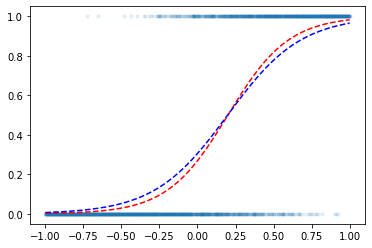

In [ ]:
plt.plot(x,y,'.',alpha=0.1)
plt.plot(x,v,'--r')
plt.plot(x,net(x),'--b')

#### MSE loss? 

`-` mse loss를 쓰면 왜 안되는지? 

In [ ]:
tf.random.set_seed(43052)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
mseloss_fn = lambda y,yhat: tf.reduce_mean((y-yhat)**2)
net.compile(loss=mseloss_fn, optimizer=tf.optimizers.SGD(0.1))
net.fit(x,y,epochs=1000,verbose=0,batch_size=N) 

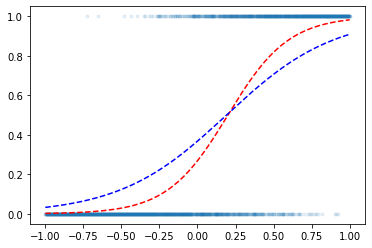

In [ ]:
plt.plot(x,y,'.',alpha=0.1)
plt.plot(x,v,'--r')
plt.plot(x,net(x),'--b')

- 일단 BCE loss와 비교해보니까 동일 초기값, 동일 epochs에서 적합이 별로임 

#### MSE loss vs BCE loss 

`-` MSEloss, BCEloss의 시각화 

In [ ]:
w0, w1 = np.meshgrid(np.arange(-10,3,0.2), np.arange(-1,10,0.2), indexing='ij')
w0, w1 = w0.reshape(-1), w1.reshape(-1)

def loss_fn1(w0,w1):
    u = w0+w1*x 
    yhat = np.exp(u)/(np.exp(u)+1)
    return mseloss_fn(y,yhat) 

def loss_fn2(w0,w1):
    u = w0+w1*x 
    yhat = np.exp(u)/(np.exp(u)+1)
    return bceloss_fn(y,yhat) 

loss1 = list(map(loss_fn1,w0,w1))
loss2 = list(map(loss_fn2,w0,w1))

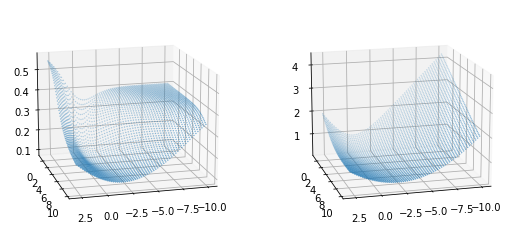

In [ ]:
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(9)
ax1=fig.add_subplot(1,2,1,projection='3d')
ax2=fig.add_subplot(1,2,2,projection='3d')
ax1.elev=15
ax2.elev=15
ax1.azim=75
ax2.azim=75
ax1.scatter(w0,w1,loss1,s=0.1)
ax2.scatter(w0,w1,loss2,s=0.1) 

- 왼쪽곡면(MSEloss)보다 오른쪽곡면(BCEloss)이 좀더 예쁘게 생김 -> 오른쪽 곡면에서 더 학습이 잘될것 같음 

`-` discussion 
- mse_loss는 경우에 따라서 엄청 수렴속도가 느릴수도 있음. 
- 근본적인 문제점: mse_loss일 경우 loss function의 곡면이 예쁘지 않음. (전문용어로 convex가 아니라고 말함)
- 좋은 옵티마이저를 이용하면 mse_loss일 경우에도 수렴속도를 올릴 수 있음 (학습과정 시각화예시2). 그렇지만 이는 근본적인 해결책은 아님. (학습과정 시각화예시3)

`-` 요약: 왜 logistic regression에서 mse loss를 쓰면 안되는가? 
- mse loss를 사용하면 손실함수가 convex하지 않으니까!
- 그리고 bce loss를 사용하면 손실함수가 convex하니까!